In [1]:
import matplotlib.pyplot as plt # For general plotting
import matplotlib.colors as mcol

import numpy as np

from scipy.stats import multivariate_normal as mvn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold 
from sklearn.svm import SVC

np.set_printoptions(suppress=True)

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

# SVM Fun

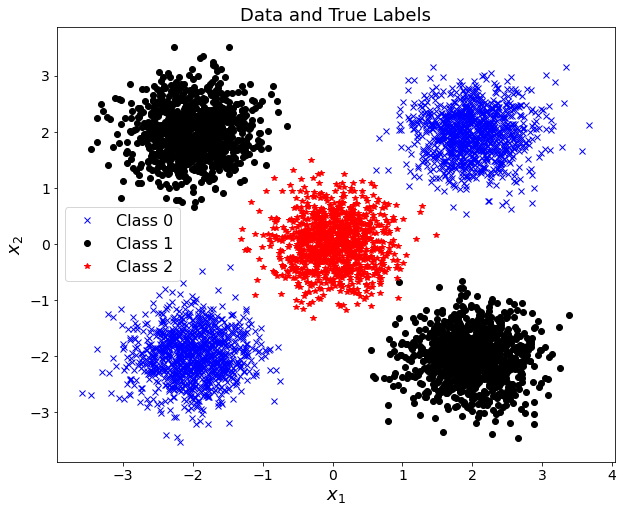

In [2]:
N = 1000

def create_data(N, noise=0.2):
    # Uses the same covariance matrix, scaled identity, for all Gaussians
    Sigma = noise * np.eye(2)
    # Five gaussian means specified to span a square and its centre
    Gs = [
        mvn(mean=[2, 2], cov=Sigma),
        mvn(mean=[-2, -2], cov=Sigma),
        mvn(mean=[2, -2], cov=Sigma),
        mvn(mean=[-2, 2], cov=Sigma),
        mvn(mean=[0, 0], cov=Sigma),
    ]
    # Draw random variable samples and assign labels, note class 3 has less samples altogether
    X = np.concatenate([G.rvs(size=N) for G in Gs])
    y = np.concatenate((np.zeros(N), np.zeros(N), np.ones(N), np.ones(N), 2 * np.ones(N)))
    
    # Will return an X and y of shapes (5*N, 2) and (5*N)
    # Representing our dataset of 2D samples
    return X, y


X, y = create_data(N)
C = len(np.unique(y))

plt.figure(figsize=(10,8))
plt.plot(X[y==0, 0], X[y==0, 1], 'bx', label="Class 0")
plt.plot(X[y==1, 0], X[y==1, 1], 'ko', label="Class 1");
plt.plot(X[y==2, 0], X[y==2, 1], 'r*', label="Class 2");
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Data and True Labels")
plt.legend()
plt.show()

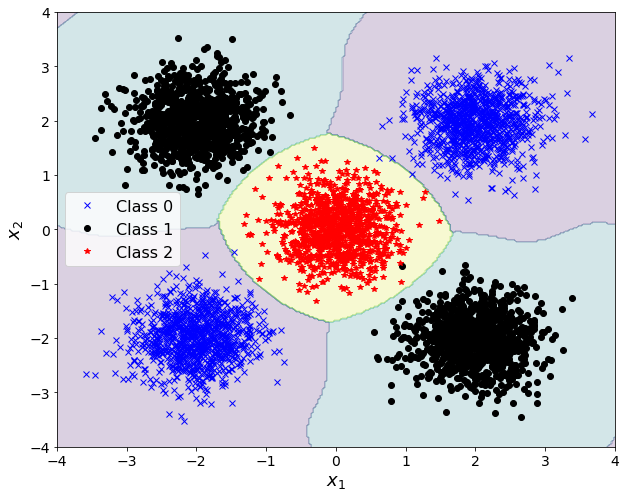

In [3]:
def plot_svm_predictions(svm):
    # Create coordinate matrices determined by the sample space
    xx, yy = np.meshgrid(np.linspace(-4, 4, 250), np.linspace(-4, 4, 250))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Matrix of predictions on rid of samples
    y_pred = svm.predict(grid).reshape(xx.shape)
    #y_decision = svm.decision_function(grid).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, alpha=0.2)
    #plt.contourf(xx, yy, y_decision, alpha=0.1)

# SVC with poly degree features
# Pipeline of sequentially applied transforms before producing the final estimation, e.g. Support Vector Classifier
polynomial_svc = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), SVC())
polynomial_svc.fit(X, y)

plt.figure(figsize=(10,8))
plt.plot(X[y==0, 0], X[y==0, 1], 'bx', label="Class 0")
plt.plot(X[y==1, 0], X[y==1, 1], 'ko', label="Class 1");
plt.plot(X[y==2, 0], X[y==2, 1], 'r*', label="Class 2");
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plot_svm_predictions(polynomial_svc)
plt.show()

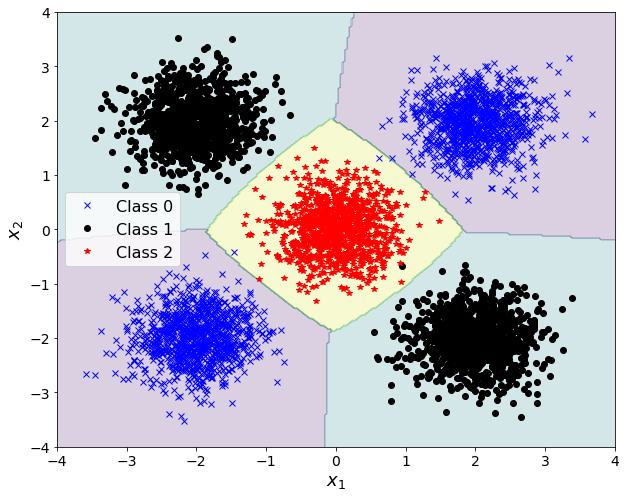

In [4]:
# SVC with Gaussian/RBF kernel
rbf_svc = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', C=0.5))
rbf_svc.fit(X, y)

plt.figure(figsize=(10,8))
plt.plot(X[y==0, 0], X[y==0, 1], 'bx', label="Class 0")
plt.plot(X[y==1, 0], X[y==1, 1], 'ko', label="Class 1");
plt.plot(X[y==2, 0], X[y==2, 1], 'r*', label="Class 2");
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plot_svm_predictions(rbf_svc)
plt.show()
plt.show()